In [1]:
!pip install langdetect
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 11.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=44d54c21eaa4130191ff7a1249f9ad9ace4e0fed5263f5f1788aed8e572b5b0b
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 6.1 MB/s 
     |████████████████████████████████| 965 kB 44.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import matplotlib.pyplot as plt, numpy as np, seaborn as sns, pandas as pd, re, nltk, itertools, spacy, textblob, time
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tree import Tree
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from string import punctuation
from langdetect import detect_langs
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


## **Review of Regular Expressions**

### ***Are they bots?***

Some tweets contain user mentions. Some of these mentions follow a very strange pattern. A few examples that you notice: `@robot3!`, `@robot5&` and `@robot7#`

To these, you will do a proof of concept with one tweet and extract them using the **`re.findall()`** method.

 
* `\d`: digit
* `\w`: word character
* `\W`: non-word character
* `\s`: whitespace

The text of one tweet was saved in the variable `sentiment_analysis`. 

* Write a regex that matches the user mentions that starts with `@` and follows the pattern, e.g. `@robot3!`.

* Find all the matches of the pattern in the `sentiment_analysis` variable.

In [ ]:
sentiment_analysis = '@robot9! @robot4& I have a good feeling that the show isgoing to be amazing! @robot9$ @robot7%'

print(re.findall(r"@robot\d\W", sentiment_analysis))
print(re.findall(r'@\w+\d\W', sentiment_analysis))

['@robot9!', '@robot4&', '@robot9$', '@robot7%']
['@robot9!', '@robot4&', '@robot9$', '@robot7%']


### ***Find the numbers (<ins>always</ins> specify whitespaces as `\s`)***

Some tweets contain the number of retweets, user mentions, and likes. You decide to extract this important information that is given as in this example:

```
Agh,snow! User_mentions:9, likes: 5, number of retweets: 4
```

You pull a list of metacharacters:`\d` digit,`\w` word character,`\s` whitespace.

Always indicate whitespace with metacharacters.

The variable `sentiment_analysis` containing the text of one tweet.


* Write a regex that matches the number of user mentions given as, for example, `User_mentions:9` in `sentiment_analysis`.

* Write a regex that matches the number of likes given as, for example, `likes: 5` in `sentiment_analysis`.

* Write a regex that matches the number of retweets given as, for example, `number of retweets: 4` in `sentiment_analysis`.

In [ ]:
sentiment_analysis = "Unfortunately one of those moments wasn't a giant squid monster. User_mentions:2, likes: 9, number of retweets: 7"

# Write a regex to obtain user mentions
print(re.findall(r"User\Smentions\S\d", sentiment_analysis))

# Write a regex to obtain number of likes
print(re.findall(r"likes\S\s\d", sentiment_analysis))

# Write a regex to obtain number of retweets
print(re.findall(r"number\sof\sretweets\S\s\d", sentiment_analysis))

['User_mentions:2']
['likes: 9']
['number of retweets: 7']


### ***Match and split***

Some of the tweets, instead of having spaces to separate words, have strange characters.  You notice that 

* the *sentences* are always separated by a special character, followed by a number, the word `break`, and after that, another special character, e.g `&4break!`,
* the *words* are always separated by a special character, the word new, and a normal random character, e.g `#newH`.

The variable `sentiment_analysis` containing the text of one tweet

* Write a regex that matches the pattern separating the sentences in `sentiment_analysis`, e.g. `&4break!`.
* Replace `regex_sentence` with a space `" "` in the variable `sentiment_analysis`. Assign it to `sentiment_sub`.
* Write a regex that matches the pattern separating the words in `sentiment_analysis`, e.g. `#newH`.
* Replace `regex_words` with a space in the variable `sentiment_sub`. Assign it to `sentiment_final` and print out the result.

In [ ]:
sentiment_analysis = 'He#newHis%newTin love with$newPscrappy. #8break%He is&newYmissing him@newLalready'
print(sentiment_analysis, '\n')

# Replace the regex_sentence with a space
sentiment_sub = re.sub(r"\W\dbreak\W", " ", sentiment_analysis)

# Replace the regex_words and print the result
sentiment_final = re.sub(r"\Wnew.", " ", sentiment_sub)

print(sentiment_final)

He#newHis%newTin love with$newPscrappy. #8break%He is&newYmissing him@newLalready 

He is in love with scrappy.  He is missing him already


## **Repetitions**

### ***Everything clean***

There are several types of strings that increase your sentiment analysis complexity. But these strings do not provide any useful sentiment. Among them, we can have links and user mentions.

In order to clean the tweets, you want to extract some examples first. You know that 

* most of the times links start with `http` and do not contain any whitespace, e.g. `https://www.datacamp.com`. 
* User mentions start with `@` and can have letters and numbers only, e.g. `@johnsmith3`.

You write down some helpful quantifiers to help you: `*` zero or more times, `+` once or more, `?` zero or once.

The list `sentiment_analysis` containing the text of three tweets are already loaded in your session. 

* Write a regex to find all the matches of `http` links appearing in each `tweet` in `sentiment_analysis`. Print out the result.

* Write a regex to find all the matches of user mentions appearing in each `tweet` in `sentiment_analysis`. Print out the result.



In [ ]:
data = ['Boredd. Colddd @blueKnight39 Internet keeps stuffing up. Save me! https://www.tellyourstory.com', 
        "I had a horrible nightmare last night @anitaLopez98 @MyredHat31 which affected my sleep, now I'm really tired",
        'im lonely  keep me company @YourBestCompany! @foxRadio https://radio.foxnews.com 22 female, new york']

sentiment_analysis = pd.Series(data=data, index=[545, 546, 547])

for tweet in sentiment_analysis:
    # Write regex to match http links and print out result
    print(re.findall(r"http\S+", tweet))

    # Write regex to match user mentions and print out result
    print(re.findall(r"@\w+", tweet))

['https://www.tellyourstory.com']
['@blueKnight39']
[]
['@anitaLopez98', '@MyredHat31']
['https://radio.foxnews.com']
['@YourBestCompany', '@foxRadio']


**`\S`** is very useful to use when you know a pattern doesn't contain spaces and you have reached the end when you do find one.

`\S` is very useful to use when you know a pattern doesn't contain spaces and you have reached the end when you do find one.

### ***Some time ago***

You are interested in knowing when the tweets were posted. After reading a little bit more, you learn that dates are provided in different ways. You decide to extract the dates using **`.findall()`** so you can normalize them afterwards to make them all look the same.

You realize that the dates are always presented in one of the following ways:

`27 minutes ago`

`4 hours ago`

`23rd june 2018`

`1st september 2019 17:25`

The list `sentiment_analysis` containing the text of three tweets, as well as the `re` module are already loaded in your session. 

* Complete the for-loop with a regex that finds all dates in a format similar to `27 minutes ago` or `4 hours ago`.

* Complete the for-loop with a regex that finds all dates in a format similar to `23rd june 2018`.

* Complete the for-loop with a regex that finds all dates in a format similar to `1st september 2019 17:25`.


In [ ]:
sentiment_analysis = pd.Series(data=['I would like to apologize for the repeated Video Games Live related tweets. 32 minutes ago',
                                     '@zaydia but i cant figure out how to get there / back / pay for a hotel 1st May 2019',
                                     'FML: So much for seniority, bc of technological ineptness 23rd June 2018 17:54'], index=[232, 233, 234])

# Complete the for loop with a regex to find dates
for date in sentiment_analysis:
  	print(re.findall(r"\d{1,2}\s\w+\sago", date))


# Complete the for loop with a regex to find dates
for date in sentiment_analysis:
	  print(re.findall(r"\d{1,2}\w*\s\w+\s\d{4}", date))
   
# Complete the for loop with a regex to find dates
for date in sentiment_analysis:
	print(re.findall(r"\d{1,2}\w*\s\w+\s\d{4}\s\d{1,2}:\d{2}", date))
 


['32 minutes ago']
[]
[]
[]
['1st May 2019']
['23rd June 2018']
[]
[]
['23rd June 2018 17:54']


### ***Getting tokens***

Your next step is to ***tokenize*** the text of your tweets. *Tokenization is the process of breaking a string into lexical units or, in simpler terms, words*. But first, you need to remove hashtags so they do not cloud your process. You realize that hashtags start with a `#` symbol and contain letters and numbers but never whitespace. After that, you plan to split the text at whitespace matches to get the tokens.

You bring your list of quantifiers to help you: `*` zero or more times, `+` once or more, `?` zero or once, `{n, m}` minimum `n`, maximum `m`.

The variable `sentiment_analysis` containing the text of one tweet as well as the `re` module are already loaded in your session.


* Replace all the matches of the regex with an empty string `""`. Assign it to `no_hashtag` variable.

* Split the text in the `no_hashtag` variable at every match of one or more consecutive whitespace.


In [ ]:
sentiment_analysis = 'ITS NOT ENOUGH TO SAY THAT IMISS U #MissYou #SoMuch #Friendship #Forever'

# Replace the regex by an empty string
no_hashtag = re.sub(r"#\S+", "", sentiment_analysis) # r'#\w+' ก็ได้

# Get tokens by splitting text
print(re.findall(r"\w+", no_hashtag))
print(re.split(r"\s+", no_hashtag))

['ITS', 'NOT', 'ENOUGH', 'TO', 'SAY', 'THAT', 'IMISS', 'U']
['ITS', 'NOT', 'ENOUGH', 'TO', 'SAY', 'THAT', 'IMISS', 'U', '']


# **Regex metacharacters**

## **`re.search()` and `re.match()`**

* re.search() หาทางหมด
* re.match() หาเฉพาะตอนต้นประโยค

## **Special characters**

* `.` matches *ANY* character except newline.
* `^` หาเฉพาะต้นประโยค
* `$` หาเฉพาะท้ายประโยค
* Escape special characters ใช้ `\`

## **OR operator**

* `|`

## **Set of characters**

* `[]` ทุกตัวในวงเล็บ
* `[^]` ทุกตัวที่ไม่อยู่ในวงเล็บ

### ***Finding files***

You are not satisfied with your tweets dataset cleaning. There are still extra strings that do not provide any sentiment. Among them are strings that refer to text file names.

You also find a way to detect them:

* They appear at the start of the string.
* They always start with a sequence of 2 or 3 upper or lowercase vowels (a e i o u).
* They always finish with the `txt` ending.

You are not sure if you should remove them directly. So you write a script to find and store them in a separate dataset.

You write down some metacharacters to help you: `^` anchor to beginning, `.` any character.

The variable `sentiment_analysis` containing the text of two tweets as well as the `re` module are already loaded in your session. 

* Write a regex that matches the pattern of the text file names, e.g. `aemyfile.txt`.

* Find all matches of the regex in the elements of `sentiment_analysis`. Print out the result.

* Replace all matches of the regex with an empty string `""`. Print out the result.

In [ ]:
sentiment_analysis = pd.Series(data=['AIshadowhunters.txt aaaaand back to my literature review. At least i have a friendly cup of coffee to keep me company',
                                     "ouMYTAXES.txt I am worried that I won't get my $900 even though I paid tax last year"], index=[780, 781])

for text in sentiment_analysis:
    # Find all matches of the regex
    print(re.findall(r"^[aeiouAEIOU]{2,3}.+txt", text)) 
    print(re.findall(r"^[aeiouAEIOU]{2,3}\w+\.txt", text))
    print(re.findall(r"^[aeiouAEIOU]{2,3}\S+?txt", text))
    # Replace all matches with empty string
    print(re.sub(r"^[aeiouAEIOU]{2,3}.+txt", "", text))
    print(re.sub(r"^[aeiouAEIOU]{2,3}\w+\.txt", "", text))
    print(re.sub(r"^[aeiouAEIOU]{2,3}\S+?txt", "", text))

['AIshadowhunters.txt']
['AIshadowhunters.txt']
['AIshadowhunters.txt']
 aaaaand back to my literature review. At least i have a friendly cup of coffee to keep me company
 aaaaand back to my literature review. At least i have a friendly cup of coffee to keep me company
 aaaaand back to my literature review. At least i have a friendly cup of coffee to keep me company
['ouMYTAXES.txt']
['ouMYTAXES.txt']
['ouMYTAXES.txt']
 I am worried that I won't get my $900 even though I paid tax last year
 I am worried that I won't get my $900 even though I paid tax last year
 I am worried that I won't get my $900 even though I paid tax last year


### ***Give me your email***

The company puts some rules to verify that the given email address is valid:

* The first part can contain: 
   * Upper `A-Z` or lowercase letters `a-z`
   * Numbers
   * Characters: `!`, `#`, `%`, `&`, `*`, `$`, `.`
* Must have `@`
* Domain:
   * Can contain any word characters
   * But only `.com` ending is allowed

The list `emails` as well as the `re` module are loaded in your session. 

* Write a regular expression to match valid email addresses as described.
* Match the regex to the elements contained in `emails`.
* To print out the message indicating if it is a valid email or not, complete `.format()` statement.

In [ ]:
emails = ['n.john.smith@gmail.com', '87victory@hotmail.com', '!#mary-=@msca.net']

for example in emails:
  	# Match the regex to the string
    if re.match(r"[A-Za-z0-9!#%&*$.]+@\w+\.com", example):
        # Complete the format method to print out the result
      	print("The email {email_example} is a valid email".format(email_example=example))
    else:
      	print("The email {email_example} is invalid".format(email_example=example))   

The email n.john.smith@gmail.com is a valid email
The email 87victory@hotmail.com is a valid email
The email !#mary-=@msca.net is invalid


Square brackets are very useful for optional characters. 

### ***Invalid password***

* It can contain lowercase `a-z` and uppercase letters `A-Z`
* It can contain numbers
* It can contain the symbols: `*#$%!&.`
* It must be at least `8` characters long but not more than `20`

The list `passwords` and the module `re` are loaded in your session. 

* Write a regular expression to check if the passwords are valid according to the description.
* Search the elements in the `passwords` list to find out if they are valid passwords.
* To print out the message indicating if it is a valid password or not, complete `.format()` statement.

In [ ]:
passwords = ['Apple34!rose', 'My87hou#4$', 'abc123']

for example in passwords:
  	# Scan the strings to find a match
    if re.match(r"[a-zA-Z0-9*#$%!&.]{8,20}", example):
        # Complete the format method to print out the result
      	print("The password {pass_example} is a valid password".format(pass_example=example))
    else:
      	print("The password {pass_example} is invalid".format(pass_example=example))   

The password Apple34!rose is a valid password
The password My87hou#4$ is a valid password
The password abc123 is invalid


## **Greedy vs. non-greedy matching**

* Greedy คือ เขียนตามปกติ
* Non-greedy คือ เขียนต่อท้าย (ต้องตามหลังพวก `+` หรือ `*`) ด้วย `?`

### ***Understanding the difference***

Remove HTML tag but keep the inside content as they are useful for analysis.

Let's take a look at this sentence containing an HTML tag:

`I want to see that <strong>amazing show</strong> again!.`

You know that to get the HTML tag you need to match anything that sits inside angle brackets `<` `>`. But the biggest problem is that the closing tag has the same structure. If you match too much, you will end up removing key information. So you need to decide whether to use a greedy or a lazy quantifier.

The string is already loaded as `string` to your session.


* Write a regex expression to replace HTML tags with an empty string.
* Print out the result.


In [ ]:
string = 'I want to see that <strong>amazing show</strong> again!'

string_notags = re.sub(r"<\w+>|</\w+>", "", string)
print(string_notags)

string_notags = re.sub(r"<.+?>", "", string)
print(string_notags)

string_notags = re.sub(r"<\S+?>", "", string)
print(string_notags)

string_notags = re.sub(r"<\/?\w+?>", "", string)
print(string_notags)

string_tags = re.sub(r"<.+>", "", string)
print(string_tags)

I want to see that amazing show again!
I want to see that amazing show again!
I want to see that amazing show again!
I want to see that amazing show again!
I want to see that  again!


Remember that a greedy quantifier will try to match as much as possible while a non-greedy quantifier will do it as few times as needed, expanding one character at a time and giving us the match we are looking for.

### ***Greedy matching***

Next, you see that numbers still appear in the text of the tweets. So, you decide to find all of them.

Let's imagine that you want to extract the number contained in the sentence `I was born on April 24th`. A lazy quantifier will make the regex return `2` and `4`, because they will match as few characters as needed. However, a greedy quantifier will return the entire `24` due to its need to match as much as possible.

The `re` module as well as the variable `sentiment_analysis` are already loaded in your session. 

* Use a lazy quantifier to match all numbers that appear in the variable `sentiment_analysis`.

* Now, use a greedy quantifier to match all numbers that appear in the variable `sentiment_analysis`.

In [ ]:
sentiment_analysis = 'Was intending to finish editing my 536-page novel manuscript tonight, but that will probably not happen. And only 12 pages are left '

# Write a lazy regex expression 
numbers_found_lazy = re.findall(r"\d+?", sentiment_analysis)

# Print out the result
print(numbers_found_lazy)

# Write a greedy regex expression 
numbers_found_greedy = re.findall(r"\d+", sentiment_analysis)

# Print out the result
print(numbers_found_greedy)

['5', '3', '6', '1', '2']
['536', '12']


Even though greedy quantifiers lead to longer matches, they are sometimes the best option. Because lazy quantifiers match as few as possible, they return a shorter match than we expected.

### ***Lazy approach***

You have done some cleaning in your dataset but you are worried that there are sentences encased in parentheses that may cloud your analysis.

Again, a greedy or a lazy quantifier may lead to different results.

For example, if you want to extract a word starting with `a` and ending with `e` in the string `I like apple pie`, you may think that applying the greedy regex `r"a.+e"` will return `apple`. However, your match will be `apple pie`. A way to overcome this is to make it lazy by using `?` which will return `apple`.

The `re` module and the variable `sentiment_analysis` are already loaded in your session.

* Use a greedy quantifier to match text that appears within parentheses in the variable `sentiment_analysis`.

* Now, use a lazy quantifier to match text that appears within parentheses in the variable `sentiment_analysis`.

In [ ]:
sentiment_analysis = "Put vacation photos online (They were so cute) a few yrs ago. PC crashed, and now I forget the name of the site (I'm crying). "

# Write a greedy regex expression to match 
sentences_found_greedy = re.findall(r"\(.+\)", sentiment_analysis)

# Print out the result
print(sentences_found_greedy)

# Write a lazy regex expression
sentences_found_lazy = re.findall(r"\(.+?\)", sentiment_analysis)

# Print out the results
print(sentences_found_lazy)

["(They were so cute) a few yrs ago. PC crashed, and now I forget the name of the site (I'm crying)"]
['(They were so cute)', "(I'm crying)"]


# **Grouping and Capturing**

### ***Try another name***


Extract the first part of the email. E.g. if you have the email `marysmith90@gmail.com`, you are only interested in `marysmith90`.
You need to match the entire expression. So you make sure to extract only names present in emails. Also, you are only interested in names containing upper (e.g. A,B, Z) or lowercase letters (e.g. a, d, z) and numbers.

The list `sentiment_analysis` containing the text of three tweets as well as the `re` module were loaded in your session. 

* Complete the regex to match the email capturing only the name part. The name part appears before the `@`.

* Find all matches of the regex in each element of `sentiment_analysis` analysis. Assign it to the variable `email_matched`.

* Complete the `.format()` method to print the results captured in each element of `sentiment_analysis`.

In [ ]:
sentiment_analysis = ['Just got ur newsletter, those fares really are unbelievable. Write to statravelAU@gmail.com or statravelpo@hotmail.com. They have amazing prices', 'I should have paid more attention when we covered photoshop in my webpage design class in undergrad. Contact me Hollywoodheat34@msn.net.', 'hey missed ya at the meeting. Read your email! msdrama098@hotmail.com']

for tweet in sentiment_analysis:
    # Find all matches of regex in each tweet
    email_matched = re.findall(r"([A-Za-z0-9]+)@", tweet)

    # Complete the format method to print the results
    print("Lists of users found in this tweet: {}".format(email_matched))

print("\n")

for tweet in sentiment_analysis:
    # Find all matches of regex in each tweet
    email_matched = re.findall(r"([\w]+)@", tweet)

    # Complete the format method to print the results
    print("Lists of users found in this tweet: {}".format(email_matched))

Lists of users found in this tweet: ['statravelAU', 'statravelpo']
Lists of users found in this tweet: ['Hollywoodheat34']
Lists of users found in this tweet: ['msdrama098']


Lists of users found in this tweet: ['statravelAU', 'statravelpo']
Lists of users found in this tweet: ['Hollywoodheat34']
Lists of users found in this tweet: ['msdrama098']


### ***Flying home***

You are given a dataset with only the email subjects for each of the people traveling. You learn that the text followed a pattern. Here is an example:

`Here you have your boarding pass LA4214 AER-CDB 06NOV.`

You need to extract the information about the flight:

* The two letters indicate the airline (e.g `LA`),
* The 4 numbers are the flight number (e.g. `4214`).
* The three letters correspond to the departure (e.g `AER`),
* The destination (`CDB`),
* The date (`06NOV`) of the flight.

All letters are always uppercase.

The variable `flight` containing one email subject was loaded in your session. 

* Find all the matches corresponding to each piece of information about the flight. Assign it to `flight_matches`.

In [ ]:
flight = 'Subject: You are now ready to fly. Here you have your boarding pass IB3723 AMS-MAD 06OCT'

# Find all matches of the flight information
flight_matches = re.findall(r"([A-Z]{2})(\d{4})\s([A-Z]{3})-([A-Z]{3})\s(\d{2}[A-Z]{3})", flight)
    
#Print the matches
print("Airline: {} Flight number: {}".format(flight_matches[0][0], flight_matches[0][1]))
print("Departure: {} Destination: {}".format(flight_matches[0][2], flight_matches[0][3]))
print("Date: {}".format(flight_matches[0][4]))

Airline: IB Flight number: 3723
Departure: AMS Destination: MAD
Date: 06OCT


# **Alternation and non-capturing groups**

## **Non-capturing groups**

Match but not capture a group

* `(?:regex)`
* อาจจะคิดว่า มันต่างจากไม่ใส่วงเล็บตรงไหน ดูตัวอย่างข้างล่าง ใช้ `(?:\d{2}-){3}` ถ้าไม่ใช้แบบนี้ก็ต้องเขียนเรียงตัวแบบอันล่างสุด

In [ ]:
my_string = "John Smith: 34-35-19-042-980, Rebeca Smith: 10-10-10-434-425"
print(re.findall(r"(?:\d{2}-){3}(\d{3}-\d{3})", my_string))
print(re.findall(r"\d{2}-\d{2}-\d{2}-(\d{3}-\d{3})", my_string))

['042-980', '434-425']
['042-980', '434-425']


In [ ]:
my_date = "Today is 23rd May 2019. Tomorrow is 24th May 19."
print(re.findall(r"(\d+)(?:th|rd)", my_date))
print(re.findall(r"(\d+)[a-z]{2}", my_date))

['23', '24']
['23', '24']


### ***Love it!***

You want to identify positive tweets about movies and concerts.

You plan to find all the sentences that contain the words `love`, `like`, or `enjoy` and capture that word. You will limit the tweets by focusing on those that contain the words `movie` or `concert` by keeping the word in another group. You will also save the movie or concert name.

For example, if you have the sentence: `I love the movie Avengers.` You match and capture `love`. You need to match and capture `movie`. Afterwards, you match and capture anything until the dot.

The list `sentiment_analysis` containing the text of three tweets and the `re` module are loaded in your session. 

* Complete the regular expression to capture the words `love` or `like` or `enjoy`. Match and capture the words `movie` or `concert`. Match and capture anything appearing until the `.`.

* Find all matches of the regex in each element of `sentiment_analysis`. Assign them to `positive_matches`.

* Complete the `.format()` method to print out the results contained in `positive_matches` for each element in `sentiment_analysis`.

In [ ]:
sentiment_analysis = ['I totally love the concert The Book of Souls World Tour. It kinda amazing!',
                      'I enjoy the movie Wreck-It Ralph. I watched with my boyfriend.',
                      "I still like the movie Wish Upon a Star. Too bad Disney doesn't show it anymore."]

for tweet in sentiment_analysis:
	# Find all matches of regex in tweet
    positive_matches = re.findall(r"(love|like|enjoy).+?(movie|concert)\s(.+?)\.", tweet)
    
    # Complete format to print out the results
    print("Positive comments found {}".format(positive_matches))

print("\n")

for tweet in sentiment_analysis:
	# Find all matches of regex in tweet
    positive_matches = re.findall(r"(love|like|enjoy).+?(movie|concert)\s(.*?)\.", tweet)
    
    # Complete format to print out the results
    print("Positive comments found {}".format(positive_matches))

Positive comments found [('love', 'concert', 'The Book of Souls World Tour')]
Positive comments found [('enjoy', 'movie', 'Wreck-It Ralph')]
Positive comments found [('like', 'movie', 'Wish Upon a Star')]


Positive comments found [('love', 'concert', 'The Book of Souls World Tour')]
Positive comments found [('enjoy', 'movie', 'Wreck-It Ralph')]
Positive comments found [('like', 'movie', 'Wish Upon a Star')]


### ***Ugh! Not for me!***

After finding positive tweets, you want to do it for negative tweets. Your plan now is to find sentences that contain the words `hate`, `dislike` or `disapprove`. You will again save the `movie` or `concert` name. You will get the tweet containing the words `movie` or `concert` but this time, you don't plan to save the word.

For example, if you have the sentence: `I dislike the movie Avengers a lot.`. You match and capture `dislike`. You will match but not capture the word `movie`. Afterwards, you match and capture anything until the dot.

The list `sentiment_analysis` containing the text of three tweets as well as the `re` module are loaded in your session. 

* Complete the regular expression to capture the words `hate` or `dislike` or `disapprove`. Match but don't capture the words `movie` or `concert`. Match and capture anything appearing until the `.`.

* Find all matches of the regex in each element of `sentiment_analysis`. Assign them to `negative_matches`.

* Complete the `.format()` method to print out the results contained in `negative_matches` for each element in `sentiment_analysis`.

In [ ]:
sentiment_analysis = ['That was horrible! I really dislike the movie The cabin and the ant. So boring.',
                      "I disapprove the movie Honest with you. It's full of cliches.",
                      'I dislike very much the concert After twelve Tour. The sound was horrible.']

for tweet in sentiment_analysis:
	  # Find all matches of regex in tweet
    negative_matches = re.findall(r"(hate|dislike|disapprove).+?(?:movie|concert)\s(.+?)\.", tweet)
    
    # Complete format to print out the results
    print("Negative comments found {}".format(negative_matches))

Negative comments found [('dislike', 'The cabin and the ant')]
Negative comments found [('disapprove', 'Honest with you')]
Negative comments found [('dislike', 'After twelve Tour')]


## **Backreferences**

### ***Parsing PDF files***

You now need to work on another small project you have been delaying. Your company gave you some PDF files of signed contracts. The goal of the project is to create a database with the information you parse from them. Three of these columns should correspond to the day, month, and year when the contract was signed.
The dates appear as `Signed on 05/24/2016` (`05` indicating the month, `24` the day). You decide to use capturing groups to extract this information. Also, you would like to retrieve that information so you can store it separately in different variables.

You decide to do a proof of concept.

The variable `contract` containing the text of one contract and the `re` module are already loaded in your session.

* Write a regex that captures the month, day, and year in which the `contract` was signed. Scan `contract` for matches.
* Assign each captured group to the corresponding keys in the dictionary.
* Complete the positional method to print out the captured groups. Use the values corresponding to each key in the dictionary.

In [ ]:
contract = 'Provider will invoice Client for Services performed within 30 days of performance.  Client will pay Provider as set forth in each Statement of Work within 30 days of receipt and acceptance of such invoice. It is understood that payments to Provider for services rendered shall be made in full as agreed, without any deductions for taxes of any kind whatsoever, in conformity with Provider’s status as an independent contractor. Signed on 03/25/2001.'
dates = re.search(r"Signed\son\s(\d{2})/(\d{2})/(\d{4})", contract)

# Assign to each key the corresponding match
signature = {"day": dates.group(2),
             "month": dates.group(1),
             "year": dates.group(3)}
             
# Complete the format method to print-out
print("Our first contract is dated back to {data[year]}. Particularly, the day {data[day]} of the month {data[month]}.".format(data=signature))

Our first contract is dated back to 2001. Particularly, the day 25 of the month 03.


Only if you use **`.search()`** and **`.match()`**, can you use **`.group()`** to retrieve the groups.

### ***Close the tag, please!***

You need to write a short script for checking that every HTML tag that is open has its proper closure.

You have an example of a string containing HTML tags:

`<title>The Data Science Company</title>`

You learn that an opening HTML tag is always at the beginning of the string. It appears inside `<>`. A closing tag also appears inside `<>`, but it is preceded by `/`.

You also remember that capturing groups can be referenced using numbers, e.g `\4`.

The list `html_tags`, containing three strings with HTML tags, and the `re` module are loaded in your session. 

* Complete the regex in order to match closed HTML tags. Find if there is a match in each string of the list `html_tags`. Assign the result to `match_tag`.

* If a match is found, print the first group captured and saved in `match_tag`.

* If no match is found, complete the regex to match only the text inside the HTML tag. Assign it to `notmatch_tag`.

* Print the first group captured by the regex and save it in `notmatch_tag`.

In [ ]:
html_tags = ['<body>Welcome to our course! It would be an awesome experience</body>',
             '<article>To be a data scientist, you need to have knowledge in statistics and mathematics</article>',
             '<nav>About me Links Contact me!']

for string in html_tags:
    # Complete the regex and find if it matches a closed HTML tags
    match_tag =  re.match(r"<(\w+)>.*?</\1>", string)
 
    if match_tag:
        # If it matches print the first group capture
        print("Your tag {} is closed".format(match_tag.group(1))) 
    else:
        # If it doesn't match capture only the tag 
        notmatch_tag = re.match(r"<(\w+)>", string)
        # Print the first group capture
        print("Close your {} tag!".format(notmatch_tag.group(1)))

Your tag body is closed
Your tag article is closed
Close your nav tag!


### ***Reeepeated characters***

Back to your sentiment analysis! Your next task is to replace elongated words that appear in the tweets. We define an elongated word as a word that contains a repeating character twice or more times. e.g. `"Awesoooome"`.

Replacing those words is very important since a classifier will treat them as a different term from the source words lowering their frequency.

To find them, you will use capturing groups and reference them back using numbers. E.g `\4`.

If you want to find a match for `Awesoooome`, you first need to capture `Awes`. Then, match `o` and reference the same character back, and then, `me`.

The list `sentiment_analysis`, containing the text of three tweets, and the `re` module are loaded in your session. 

* Complete the regular expression to match an elongated word as described.

* Search the elements in `sentiment_analysis` list to find out if they contain elongated words. Assign the result to `match_elongated`.

* Assign the captured group number zero to the variable `elongated_word`.

* Print the result contained in the variable `elongated_word`.

In [ ]:
sentiment_analysis = ['@marykatherine_q i know! I heard it this morning and wondered the same thing. Moscooooooow is so behind the times',
                      'Staying at a friends house...neighborrrrrrrs are so loud-having a party',
                      'Just woke up an already have read some e-mail']
              
for tweet in sentiment_analysis:
    # Find if there is a match in each tweet 
    match_elongated = re.search(r"\w+(\w)\1\w*", tweet)
      
    if match_elongated:
        # Assign the captured group zero 
        elongated_word = match_elongated.group(0)
            
        # Complete the format method to print the word
        print("Elongated word found: {word}".format(word=elongated_word))
    else:
        print("No elongated word found") 

## **Lookaround**

## **มองคำต่อไป**

 * **คำต่อไปตามด้วย  `?=`**


In [ ]:
re.findall(r"\w+\.txt(?=\stransferred) ", "tweets.txt transferred, mypass.txt transferred, keywords.txt error")

['tweets.txt ', 'mypass.txt ']

 * **คำต่อไปต้องไม่ตามด้วย  `?!`**

In [ ]:
re.findall(r"\w+\.txt(?!\stransferred) ", "tweets.txt transferred, mypass.txt transferred, keywords.txt error")

['keywords.txt ']

## **มองคำก่อนหน้า**

* **คำก่อนหน้า ต้องเป็นคำนี้ `?<=`**

In [ ]:
re.findall(r"(?<=white\s)(cat|dog)", "My white cat sat at the table. However, my brown dog was lying on the couch.")

['cat']

* **คำก่อนหน้า ต้องไม่เป็นคำนี้  `?<!`**

In [ ]:
re.findall(r"(?<!white\s)(cat|dog)", "My white cat sat at the table. However, my brown dog was lying on the couch.")

['dog']

### ***Surrounding words***

Now, you want to perform some visualizations with your `sentiment_analysis` dataset. You are interested in the words surrounding python. You want to count how many times a specific words appears right before and after it.

***Positive lookahead*** `(?=)` makes sure that first part of the expression is followed by the lookahead expression. ***Positive lookbehind*** `(?<=)` returns all matches that are preceded by the specified pattern.

The variable `sentiment_analysis`, containing the text of one tweet, and the `re` module are loaded in your session. 


* Get all the words that are followed by the word `python` in `sentiment_analysis`. Print out the word found.

* Get all the words that are preceded by the word `python` or `Python` in `sentiment_analysis`. Print out the words found.

In [ ]:
sentiment_analysis = 'You need excellent python skills to be a data scientist. Must be! Excellent python'

# Positive lookahead
look_ahead = re.findall(r"\w+\s(?=python)", sentiment_analysis)

# Print out
print(look_ahead)

# Positive lookahead
look_ahead = re.findall(r"\w+(?=\spython)", sentiment_analysis)

# Print out
print(look_ahead)

# Positive lookbehind
look_behind = re.findall(r"(?<=Python\s|python\s)\w+", sentiment_analysis)

# Print out
print(look_behind)

# Positive lookbehind
look_behind = re.findall(r"(?<=[Pp]ython\s)\w+", sentiment_analysis)

# Print out
print(look_behind)

['excellent ', 'Excellent ']
['excellent', 'Excellent']
['skills']
['skills']


### ***Filtering phone numbers***

Now, you need to write a script for a cell-phone searcher. It should scan a list of phone numbers and return those that meet certain characteristics.

The phone numbers in the list have the structure:

* Optional area code: 3 numbers
* Prefix: 4 numbers
* Line number: 6 numbers
* Optional extension: 2 numbers

E.g. `654-8764-439434-01`.

You decide to use `.findall()` and the non-capturing group's negative lookahead `(?!)` and negative lookbehind `(?<!)`.

The list `cellphones`, containing three phone numbers, and the `re` module are loaded in your session. 

* Get all cell phones numbers that are not preceded by the optional area code.
* Get all the cell phones numbers that are not followed by the optional extension.

In [ ]:
cellphones = ['4564-646464-01', '345-5785-544245', '6476-579052-01']

for phone in cellphones:
    # Get all phone numbers not preceded by area code
    number = re.findall(r"(?<!\d{3}-)\d{4}-\d{6}-\d{2}", phone)
    print(number)

for phone in cellphones:
    # Get all phone numbers not followed by optional extension
    number = re.findall(r"\d{3}-\d{4}-\d{6}(?!-\d{2})", phone)
    print(number)

['4564-646464-01']
[]
['6476-579052-01']
[]
['345-5785-544245']
[]


# **Intro**

### ***How many positive and negative reviews are there?***

As a first step in a sentiment analysis task, similar to other data science problems, we have to explore the dataset in more detail.

You will work with a sample of the IMDB movies reviews. A dataset called `movies` has been created for you. 

* Find the number of positive and negative reviews in the movies dataset.
* Find the proportion (percentage) of positive and negative reviews in the dataset.




In [ ]:
movies = pd.read_csv('IMDB_sample.csv')

# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movies['label'].value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', movies['label'].value_counts(normalize=True))

Number of positive and negative reviews:  0    3782
1    3719
Name: label, dtype: int64
Proportion of positive and negative reviews:  0    0.504199
1    0.495801
Name: label, dtype: float64


### ***Longest and shortest reviews***

* Use the review column of the movies dataset to find the length of the longest review.
* Similarly, find the length of the shortest review.

In [ ]:
length_reviews = movies.review.str.len()

# How long is the longest review
print(max(length_reviews))

length_reviews = movies.review.str.len()

# How long is the shortest review
print(min(length_reviews))

10321
52


# **Sentiment analysis types and approaches**

### ***Detecting the sentiment of Tale of Two Cities***

In the video we saw that one type of algorithms for detecting the sentiment are based on a lexicon of predefined words and their corresponding polarity score. Your task in this exercise is to detect the sentiment, including polarity and subjectivity of a given string using such a rule-based approach and the **`textblob`** library in Python.

You will work with the `two_cities` string.

* Create a text blob object from the `two_cities` string.
* Print out the polarity and subjectivity.

In [ ]:
from textblob import TextBlob

two_cities = 'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'

# Create a textblob object  
blob_two_cities = TextBlob(two_cities)

# Print out the sentiment 
print(blob_two_cities.sentiment)

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


### ***Comparing the sentiment of two strings***

In this exercise, you will compare the sentiment of two different strings. A string called `annak` has been defined for you and it contains the first sentence of *Anna Karenina*. A second string called `catcher` has been created and it contains the first sentence of *The Catcher in the Rye*. 

Your task is again to detect the sentiment of each string - both their polarity and subjectivity. Which one has higher sentiment score? Did you expect that to be the case?


* Create a text blob object from the `annak` string.
* Create a text blob from the `catcher` string as well.
* Print out the polarity and subjectivity of each of the created blobs.

In [ ]:
annak = 'Happy families are all alike; every unhappy family is unhappy in its own way'
catcher = "If you really want to hear about it,the first thing you'll probably want to know is where I was born, and what my lousy childhood was like, and how my parents were occupied and all before they had me, and all that David Copperfield kind of crap, but I don't feel like going into it, if you want to know the truth."

# Create a textblob object 
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)

# Print out the sentiment   
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

Sentiment of annak:  Sentiment(polarity=0.05000000000000002, subjectivity=0.95)
Sentiment of catcher:  Sentiment(polarity=-0.05, subjectivity=0.5466666666666666)


### ***What is the sentiment of a movie review?***

In a previous exercise, you detected the sentiment of the first sentence of the Tale of Two Cities novel by Dickens. Now you will continue to work with the movie reviews dataset. Do you remember how you found the longest and shortest reviews? One of the longest reviews has been imported for you. It is called titanic as it discusses the Titanic movie. Feel free to explore it in the Shell.

Can you calculate the polarity and subjectivity of the titanic string? This review is positive (i.e. has a label of 1). Is the polarity score also positive?

* Create a text blob object from the titanic string.
* Print out the result of its sentiment property.

In [ ]:
titanic = "Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred. One of the survivors of the Titanic, Rose DeWitt Bukater, who had heard of the exploration of the wreck on television and is flown to the boat where the search is being led from to tell of what she remembers to help the search. She gets to telling her memory of the one and only voyage of the Titanic. With this, the scene shifts to Southhampton, Ireland where the Titanic set sail from on April 10, 1912 as all the passengers are boarding. After another stop on the Irish coast Titanic went out to see on its maiden voyage across the Atlantic bound for New York. Historically the first few days of the voyage went by uneventful, but the fictional plot of the story is developed during this time as Rose sees the hopeless entrapement of an engagement that she is in to the wealthy Cal Hockley and falls in love with third class passenger, Jack Dawson. Captain Smith alledgedly as shown in the movie was urged by the White Star Line Director to increase the speed of the ship so they would make the newspaper headlines and receive extra publicity by arriving in New York on Thursday night and not on Friday morning as planned. Smith then ordered the fateful decision going against his thirty-two years of experience to stretch the Titanic's legs out to full speed. The Titanic had reports that the waters in the Atlantic they were sailing in were full of icebergs, but they ignored these warnings and proceeded at full speed as shown in the movie. On April 15, 1912 at 11:39, an iceberg was sighted. They attempted to shut off the engines and turn the ship out of the path of the iceberg but there was not enough time and the ship hit the iceberg on the starboard side as depicted in the film. The portrayal of the many small holes in the side of the ship and not one large gash along the side is accurate. The crew of Titanic sent out distress calls and set off distress rockets as shown until 2:18 when the lights finally failed. The lights of the California were spotted six miles away but they failed to realize what was going on and did not respond to Titanic's many pleas for help. The California had tried earlier in the day to warn Titanic of the severe ice that had caused them to stop their trip but Titanic had brushed them off causing the California to turn off its radio and leave the Titanic on its own. The first class women and children were the first as depicted to be put into the twenty lifeboats that were on the ship. Overwhelmingly the third class passengers suffered the most amount of deaths of any class and the crew was hit hard in this tragedy too. The word of White Star Line employees and first class passengers was believed over that of second and third class passengers when authorities were trying to gain information of the sinking. Also, the metal that was used to build the Titanic has been found in recent years under conditions of severe cold, which were experienced the night Titanic sank to be extremely brittle. Overall, the basic plot is very accurate in its portayal of the events and the times at which these events took place on the Titanic.<br /><br />Many of the characters in the story were not real and created simply for the purpose of the movie or as composite characters to represent possible characteristics and ideas of people on the ship. The core group of Rose, Jack, Cal, and Rose's mother all were fictional characters added into the story as they represent different groups of people from the time. Yet many characters such as the Unsinkable Molly Brown; Captain Edward Smith; the ship designer, Thomas Andrew; the White Star Line Representative, Bruce Ismay; and all of the Titanic's officers were real. The maiden voyage was going to be Captain Edward Smith's last voyage anyway as he planned to retire afterwards. He had been a part of the White Star Line since 1880 where he worked his way up to his status as the Millionaire's Captain when the Titanic sunk. The portrayals of the officers is accurate as only four survived the tragedy except for the officer who threatened to kill all of the passengers of the ship with his pistol. He is on record as acting heroicly and was misportrayed to the point that James Cameron apologized and evoked a monument in his honor in the officer's former Canadian hometown. As shown in the movie there was a language problem between the crew and many of the lower-class passengers from non-English speaking nations. In addition, Officer Lowe was the only officer who came back in the lifeboat as depicted. The old people shown in their bed as the water came in their room were based on the Strauss'. Not wanting to leave her husband's side Mrs. Strauss refused to get in her lifeboat and died with her husband on the Titanic. Furthermore, Mr. Goggenheim who was shown sipping his brandy and smoking a cigar reportedly did go out like this dressed in his best. The richest man on the ship, John Jacob Astor, who owned most of Manhattan died nonetheless as well, but his much younger wife was saved in a lifeboat. In addition, Molly Brown was saved and later had medals made up for the crew of the Carpethia that picked the survivors of Titanic up from the water. Her ticket on the Titanic had cost over four-thousand dollars and by the end of her life she ended up broke. All of the interiors of the ship were masterfully replacated down to the last pieces of china and silverware. The gymnasium, which is hardly seen is recreated perfectly with all of the machines reproduced to match those seen in old photographs. The wonderful outfits and costuming were an excellent re-creation of the Post-Victorian era of 1912. The rich at this time practically ruled everything, as the women's suffrage movement had not quite gotten moving yet. Women during this time often married for financial security as Rose was considering doing and normally took a back seast status to their husbands as Cal wished for Rose to do. The rich did not take well to `new money' such as Molly Brown as depicted. Everything of the time was very formal. Women had to be escorted to dinner by a male figure as seen with in the dining scenes. Smoking was not very common among women of the time but holders of cigarettes, which were just coming in at the time were used as seen with Rose in the movie. Men of the time generally smoked cigars not cigarettes. Women were constained physically by their corsets and socially by society. Although James Cameron had no background in historical films he brought in experts of Titanic coupled with two years spent cross-referencing the history of the Titanic and few liberties were taken. The beautiful cinematography and special effects also helped to make the film even more breathtaking.<br /><br />A recognizable message can be seen in the movie Titanic as the people on the ship had about three hours to contemplate their demise. The director, James Cameron, shows the various reactions to this time of crisis in people's lives. Everyone reacts differently and he gets you to think of how you might have reacted had you been in that situation on the Titanic on that fateful night. In addition, this film is a reflection of the 1990's when it was produced as it gives a look into the wreck of the Titanic. Only in the past fifteen years has the site of the actual Titanic been found and explored. This movie was able to give us a deeper look into a disaster that many would not have viewed. However, the moral question of whether people today should be taking treasures from the wreck of an underwater graveyard is posed. There have been attempts to stop treasure seeking missions such as the one portrayed in Titanic but all have failed. As it stands today anyone can make a voyage to the Titanic and take whatever valuables they as portrayed in the film showing the general values of our time on this matter.<br /><br />Technically the film is very well done. To get footage of the wreck at the bottom of the ocean it took twelve dives to get all of the footage needed for the movie. In addition, a special camera had to be created to withstand the intense pressure at the bottom of the ocean. Cameron did not plan on using the probe to go as far inside Titanic as anyone has in the 88 years since the ship sunk but it worked out that this provided an unique perspective into the ship. Furthermore, throughout the film fade ins and outs from the wreck of Titanic to the scene of Titanic during its actual voyage. This shift between the modern scene to the past scene during the voyage works as an excellent transition that makes the story easy to follow in aclear manner. At the very beginning of the movie a septune recreation is used to recreate the scene when the actual people left the European coast on Titanic giving it distinction from the rest of the events of the film.<br /><br />Titanic plays almost like a historical biography and is like a work of art, a true epic. Like most history novels, we know the ending, but it doesn't take away from the wonderful treats that can be found in this picture. Certain aspects of this film are Academy Award material including costuming, sound, cintematography, and editing. If you like interesting characters that will give you an insight into the life of characters in the early 1900's and how they face disaster, then this movie definitely is for you.<br /><br />"

# Create a textblob object  
blob_titanic = TextBlob(titanic)

# Print out its sentiment  
print(blob_titanic.sentiment)

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


# **Word Cloud**

### ***Your first word cloud***

We saw in the video that word clouds are very intuitive and a great and fast way to get a first impression on what a piece of text is talking about.

In this exercise, you will build your first word cloud. A string `east_of_eden` has been defined for you. It contains one of the first sentences of John Steinbeck's novel East of Eden. 


* Generate a word cloud using the `east_of_eden` string. The background color has been specified as `white`.
* Create a figure from the word cloud object you generated in the previous step.

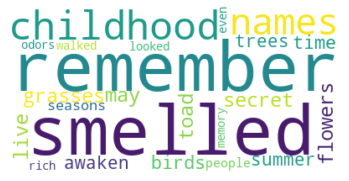

In [ ]:
east_of_eden = 'I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich.'

# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)

# Create a figure of the generated cloud
plt.imshow(cloud_east_of_eden, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

### ***Word Cloud on movie reviews***

The string `descriptions` has been created for you by concatenating the descriptions of the top 100 positive reviews. A movie-specific set of stopwords (very frequent words, such as the, a/an, and, which will not be very informative and we'd like to exclude from the graph) is available as my_stopwords. Recall that the `interpolation` argument makes the word cloud appear more smoothly.



* Apply the word cloud function to the `descriptions` string. Set the background color as `'white'`, and change the `stopwords` argument.
* Create a wordcloud image.


In [ ]:
from wordcloud import WordCloud

# Create and generate a word cloud image 
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(descriptions)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

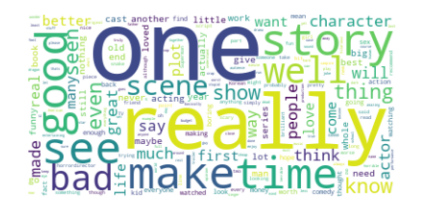

### ***Your first BOW***

A bag-of-words is an approach to transform text to numeric form.

Your task will be to work with this list and apply a BOW using the **`CountVectorizer()`**. This transformation is your first step in being able to understand the sentiment of a text. Pay attention to words which might carry a strong sentiment.

Remember that the output of a **`CountVectorizer()`** is a sparse matrix, which stores only entries which are non-zero. To look at the actual content of this matrix, we convert it to a dense array using the **`.toarray()`** method.

Note that in this case you don't need to specify the **`max_features`** argument because the text is short.


* Build and fit the vectorizer on the small dataset.
* Create the BOW representation with name `anna_bow` by calling the **`transform() `**method.

* Print the BOW result as a dense array.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Build the vectorizer and fit it
anna_vect = CountVectorizer()
anna_vect.fit(annak)

# Create the bow representation
anna_bow = anna_vect.transform(annak)

# Print the bag-of-words result 
print(anna_bow.toarray())
pd.DataFrame(data=anna_bow.toarray(), columns=anna_vect.get_feature_names())

[[1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1 1 2 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,alike,all,are,every,families,family,happy,in,is,its,own,unhappy,way
0,1,1,1,0,1,0,1,0,0,0,0,0,0
1,0,0,0,1,0,1,0,1,1,1,1,2,1


### ***BOW using product reviews***

You practiced a BOW on a small dataset. Now you will apply it to a sample of Amazon product reviews. The data has been imported for you and is called `reviews`. It contains two columns. The first one is called score and it is `0` when the review is negative, and `1` when it is positive. The second column is called `review` and it contains the text of the review that a customer wrote. 

Your task is to build a BOW vocabulary, using the review column.

Remember that we can call the **`.get_feature_names()`** method on the vectorizer to obtain a list of all the vocabulary elements.


* Create a **`CountVectorizer`** object, specifying the maximum number of features.
* Fit the vectorizer.
* Transform the fitted vectorizer.
* Create a DataFrame where you transform the sparse matrix to a dense array and make sure to correctly specify the names of columns.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 

reviews = pd.read_csv('amazon_reviews_sample.csv')

# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=100)
# Fit the vectorizer
vect.fit(reviews.review)

# Transform the review column
X_review = vect.transform(reviews.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **N-grams**

### ***Specify token sequence length with BOW***

We saw in the video that by specifying different length of tokens - what we called n-grams - we can better capture the context, which can be very important.

In this exercise, you will work with a sample of the Amazon product reviews. Your task is to build a BOW vocabulary, using the `review` column and specify the sequence length of tokens.


* Build the vectorizer, specifying the token sequence length to be uni- and bigrams.

* Fit the vectorizer.
* Transform the fitted vectorizer.
* In the DataFrame, make sure to correctly specify the column names.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 

reviews = pd.read_csv('amazon_reviews_sample.csv').head(100)

# Build the vectorizer, specify token sequence and fit
vect = CountVectorizer(ngram_range=(1, 2))
vect.fit(reviews.review)

# Transform the review column
X_review = vect.transform(reviews.review)

# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   10  10 95  10 cups  100  100 years  110  110 years  114622  \
0   0      0        0    0          0    0          0       0   
1   0      0        0    0          0    0          0       0   
2   0      0        0    0          0    0          0       0   
3   0      0        0    0          0    0          0       0   
4   0      0        0    0          0    0          0       0   

   114622 excellent  12  ...  youtube video  yr  yr old  yucky  yucky thick  \
0                 0   0  ...              0   0       0      0            0   
1                 0   0  ...              0   0       0      0            0   
2                 0   0  ...              0   0       0      0            0   
3                 0   0  ...              0   0       0      0            0   
4                 0   0  ...              0   0       0      0            0   

   zelbessdisk  zelbessdisk three  zen  zen baseball  zen motorcycle  
0            0                  0    0             0           

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



### ***Size of vocabulary of movies reviews***

In this exercise, you will practice different ways to limit the size of the vocabulary using a sample of the `movies` reviews dataset. The first column is the `review`, which is of type object and the second column is the `label`, which is `0` for a negative review and `1` for a positive one.

The three methods that you will use will transform the text column to new numeric columns, capturing the count of a word or a phrase in each review. Each method will ultimately result in building a different number of new features.

* Using the `movies` dataset, limit the size of the vocabulary to `100`.


* Using the `movies` dataset, limit the size of the vocabulary to include terms which occur in no more than `200` documents.

* Using the `movies` dataset, limit the size of the vocabulary to ignore terms which occur in less than `50` documents.


In [ ]:
movies = pd.read_csv('amazon_reviews_sample.csv').head(1000)

from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify size of vocabulary and fit
vect = CountVectorizer(max_features=100)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

###########################################################################

# Build and fit the vectorizer
vect = CountVectorizer(max_df=200)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

##########################################################################

# Build and fit the vectorizer
vect = CountVectorizer(min_df=50)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


   about  after  all  also  am  an  and  any  are  as  ...  well  what  when  \
0      0      0    1     0   0   0    2    0    0   0  ...     1     0     0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0     0   
2      0      0    3     0   0   1    4    0    1   1  ...     1     0     0   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0     0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0     0   

   which  who  will  with  would  you  your  
0      0    2     0     1      2    0     1  
1      0    0     0     0      1    1     0  
2      1    1     0     0      1    2     0  
3      0    0     0     0      0    0     0  
4      0    0     0     0      0    3     1  

[5 rows x 100 columns]
   00  000  0070412901  0072316373  07  10  100  100th  101  102  ...  \
0   0    0           0           0   0   0    0      0    0    0  ...   
1   0    0           0           0   0   0    0      0    0    0  ...   


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### ***BOW with n-grams and vocabulary size***

In this exercise, you will practice building a bag-of-words once more, using the reviews dataset of Amazon product reviews. Your main task will be to limit the size of the vocabulary and specify the length of the token sequence.

* Build the vectorizer and make sure to specify the following parameters: the size of the vocabulary should be limited to 1000, include only bigrams, and ignore terms that appear in more than 500 documents.

* Fit the vectorizer to the review column.

* Create a DataFrame from the BOW representation.

In [ ]:
#Import the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Build the vectorizer, specify max features and fit
vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(reviews.review)

# Transform the review
X_review = vect.transform(reviews.review)

# Create a DataFrame from the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   1980 style  aa batteries  aaa batteries  able to  about the  about this  \
0           0             0              0        0          0           0   
1           0             0              0        0          0           0   
2           0             0              0        0          0           0   
3           0             0              0        0          0           0   
4           0             0              0        0          0           0   

   across the  after that  again the  ahead of  ...  you know  you look  \
0           0           0          0         0  ...         0         0   
1           0           0          0         0  ...         0         0   
2           0           0          0         0  ...         0         0   
3           0           0          0         0  ...         0         0   
4           0           0          0         0  ...         1         0   

   you need  you should  you ve  you want  you will  your imagination  \
0      

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **Build new features from text**

## ***Tokenize a string from GoT***

A first standard step when working with text is to <ins>***tokenize it***</ins>, in other words, split a bigger string into individual strings, which are usually single words (tokens).

A string `GoT` has been created for you and it contains a quote from George R.R. Martin's Game of Thrones. Your task is to split it into individual tokens.


* Transform the GoT string to word tokens.

In [ ]:
from nltk import word_tokenize

GoT = 'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'

# Transform the GoT string to word tokens
print(word_tokenize(GoT))

['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


## ***Word tokens from the Avengers***


A list avengers has been created for you. It contains a few quotes from the Avengers movies. You can explore it in the IPython Shell.

Instructions
100 XP
Import the required function and package.
Apply the word tokenizing function on each item of our list.

In [ ]:
avengers = ["Cause if we can't protect the Earth, you can be d*** sure we'll avenge it", 
            'There was an idea to bring together a group of remarkable people, to see if we could become something more',
            "These guys come from legend, Captain. They're basically Gods."]

# Import the word tokenizing function
from nltk import word_tokenize

# Tokenize each item in the avengers 
tokens_avengers = [word_tokenize(item) for item in avengers]

print(tokens_avengers)

[['Cause', 'if', 'we', 'ca', "n't", 'protect', 'the', 'Earth', ',', 'you', 'can', 'be', 'd', '*', '*', '*', 'sure', 'we', "'ll", 'avenge', 'it'], ['There', 'was', 'an', 'idea', 'to', 'bring', 'together', 'a', 'group', 'of', 'remarkable', 'people', ',', 'to', 'see', 'if', 'we', 'could', 'become', 'something', 'more'], ['These', 'guys', 'come', 'from', 'legend', ',', 'Captain', '.', 'They', "'re", 'basically', 'Gods', '.']]


## ***A feature for the length of a review***

You have now worked with a string and a list with string items, it is time to use a larger sample of data.

Your task in this exercise is to create a new feature for the length of a review, using the familiar `reviews` dataset.


* Apply the function to the review column of the reviews dataset.
* Iterate over the created `word_tokens` list.
* As you iterate, find the length of each item in the list and append it to the empty `len_tokens` list.
* Create a new feature `n_words` in `reviews` for the length of the reviews.

In [ ]:
reviews = pd.read_csv('amazon_reviews_sample.csv').head(100).drop(columns='Unnamed: 0')

from nltk import word_tokenize

# Tokenize each item in the review column 
word_tokens = [word_tokenize(review) for review in reviews['review']]

# Print out the first item of the word_tokens list
print(word_tokens[0])

# Create an empty list to store the length of reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in word_tokens:
     len_tokens.append(len(i))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens
reviews.head()

['Stuning', 'even', 'for', 'the', 'non-gamer', ':', 'This', 'sound', 'track', 'was', 'beautiful', '!', 'It', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'I', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'I', 'have', 'played', 'the', 'game', 'Chrono', 'Cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'I', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'It', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'It', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']


,score,review,n_words
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109


# **Can you guess the language**

## ***Identify the language of a string***

Sometimes you might need to analyze the sentiment of non-English text. Your first task in such a case will be to identify the foreign language.

In this exercise you will identify the language of a single string. A string called `foreign` has been created for you. It has been randomly extracted from the reviews dataset and may contain some grammatical errors. Feel free to explore it in the IPython Shell.


* Detect the language of the foreign string.

In [ ]:
from langdetect import detect_langs
# Detect the language of the foreign string
print(detect_langs(foreign))

## ***Detect language of a list of strings***

Now you will detect the language of each item in a list. A list called `sentences` has been created for you and it contains 3 sentences, each in a different language. They have been randomly extracted from the product reviews dataset.

Instructions
100 XP
Iterate over the sentences in the list.
Detect the language of each sentence and append the detected language to the empty list languages.



In [ ]:
sentences = ["L'histoire rendu était fidèle, excellent, et grande.",
 'Excelente muy recomendable.',
 'It had a leak from day one but the return and exchange process was very quick.']

from langdetect import detect_langs

languages = []

# Loop over the sentences in the list and detect their language
for sentence in sentences:
    languages.append(detect_langs(sentence))
    
print('The detected languages are: ', languages)

The detected languages are:  [[fr:0.9999961886776522], [es:0.9999958156646152], [en:0.9999964991277693]]


## ***Language detection of product reviews***\

You will practice language detection on a small dataset called `non_english_reviews`. It is a sample of non-English reviews from the Amazon product reviews.

You will iterate over the rows of the dataset, detecting the language of each row and appending it to an empty list. The list needs to be cleaned so that it only contains the language of the review such as 'en' for English instead of the regular output en:0.9987654. Remember that the language detection function might detect more than one language and the first item in the returned list is the most likely candidate. Finally, you will assign the list to a new column.

The logic is the same as used in the slides and the exercise before but instead of applying the function to a list, you work with a dataset.

Instructions
100 XP
Iterate over the rows of the non_english_reviews dataset.
Inside the loop, detect the language of the second column of the dataset.
Clean the string by splitting on a : inside the list comprehension expression.
Finally, assign the cleaned list to a new column.

In [ ]:
from langdetect import detect_langs
languages = [] 

# Loop over the rows of the dataset and append  
for row in range(len(non_english_reviews)):
    languages.append(detect_langs(non_english_reviews.iloc[row, 1]))

# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature 
non_english_reviews['language'] = languages

print(non_english_reviews.head())

# **Stop Words**

### ***Word cloud of tweets***

Your task in this exercise is to plot a word cloud using a sample of Twitter data, expressing customers' sentiments about airlines. A string `text_tweet` has been created for you and it contains the messages of a 1000 customers shared on Twitter.

In the first step, your are asked to build the word cloud without removing the stop words, and in the second step to build the same cloud after you have removed the stop words.

Feel free to familiarize yourself with the `text_tweet` list.


* Import the word cloud function and package.
* Create and generate the word cloud, using the text_tweet vector.
* Define the default list of stop words and update it.
* Specify the stop words argument in the **`WordCloud`** function.

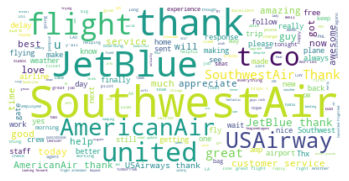

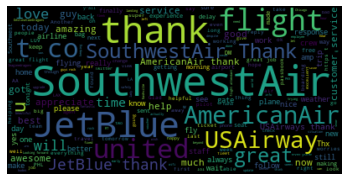

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

my_stop_words = set(STOPWORDS).update(['airline', 'airplane'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

Do you notice any changes in the first word cloud where you did not remove the stop words and the second one, where you removed them? If the change is not so obvious, perhaps the list of stop words needs to be enriched further.

## ***Airline sentiment with stop words***

You are given a dataset, called `tweets`, which contains customers' reviews and sentiments about airlines. It consists of two columns: `airline_sentiment` and `text` where the sentiment can be positive, negative or neutral, and the text is the text of the tweet.

In this exercise, you will create a BOW representation but will account for the stop words. Remember that stop words are not informative and you might want to remove them. That will result in a smaller vocabulary and eventually, fewer features. Keep in mind that we can enrich a default list of stop words with ones that are specific to our context.

* Import the default list of English stop words.
* Update the default list of stop words with the given list `['airline', 'airlines', '@']` to create `my_stop_words`.
* Specify the stop words argument in the vectorizer.

In [ ]:
tweets = pd.read_csv('Tweets.csv')[['airline_sentiment', 'text', 'negativereason']].head(1001).dropna()

# Import the stop words
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   00  000419  0016  0162424965446  08  10  100  1001  1032  11  ...  \
0   0       0     0              0   0   0    0     0     0   0  ...   
1   0       0     0              0   0   0    0     0     0   0  ...   
2   0       0     0              0   0   0    0     0     0   0  ...   
3   0       0     0              0   0   0    0     0     0   0  ...   
4   0       0     0              0   0   0    0     0     0   0  ...   

   yesterday  yo  youcouldntmakethis  yr  zambia  zcbjyo6lsn  zcc82u  zero  \
0          0   0                   0   0       0           0       0     0   
1          0   0                   0   0       0           0       0     0   
2          0   0                   0   0       0           0       0     0   
3          0   0                   0   0       0           0       0     0   
4          0   0                   0   0       0           0       0     0   

   zfqmpgxvs6  zone  
0           0     0  
1           0     0  
2           0     0  
3         

Did you notice that in this case the created features contain digits and other characters? Social media data can in general be quite messy and in a later video we will learn how to remove all digits and other characters and retain only more meaningful features.

## ***Multiple text columns***

In some situations, you might have more than one text column in a dataset and you might want to create a numeric representation for each of the text columns. Here, besides the text column, which contains the body of the tweet, there is a second `text` column, called `negativereason`. It contains the reason the customer left a negative review.

Your task is to build BOW representations for both columns and specify the required stop words.


* Import the vectorizer package and the default list of English stop words.
* Update the default list of English stop words and create the `my_stop_words` set.
* Specify the stop words argument in the first vectorizer to the updated set, and in the second vectorizer - the default set of English stop words.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])
 
# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS) 
vect1.fit(tweets.text)
vect2.fit(tweets['negativereason'])

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names_out()[-15:])
print(vect2.get_feature_names_out())

['year' 'years' 'yelling' 'yep' 'yes' 'yesterday' 'yo'
 'youcouldntmakethis' 'yr' 'zambia' 'zcbjyo6lsn' 'zcc82u' 'zero'
 'zfqmpgxvs6' 'zone']
['attendant' 'bad' 'booking' 'cancelled' 'complaints' 'customer' 'damaged'
 'flight' 'issue' 'late' 'longlines' 'lost' 'luggage' 'problems' 'service'
 'tell']


We can have multiple text columns in a single dataset. In that case, we can transform each of them to numeric features separately, using different arguments in the **`CountVectorizer()`** function.

# **Capturing a token pattern**

## ***Specify the token pattern***

In this exercise, you will work with the text column of the `tweets` dataset. Your task is to vectorize the object column using **`CountVectorizer`**. You will apply different patterns of tokens in the vectorizer. Remember that by specifying the token pattern, you can filter out characters.


* Build a vectorizer from the text column, specifying the pattern of tokens to be equal to `r'\b[^\d\W][^\d\W]'`.
* Build a vectorizer from the text column using the default values of the function's arguments.
* Build a second vectorizer, specifying the pattern of tokens to be equal to `r'\b[^\d\W][^\d\W]'`.

In [ ]:
tweets = pd.read_csv('Tweets.csv')[['airline_sentiment', 'text', 'negativereason']].head(1001)

# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(tweets.text)
vect.transform(tweets.text)
print('Length of vectorizer: ', len(vect.get_feature_names_out()))

# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets['text'])
vect1.transform(tweets['text'])

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets['text'])
vect2.transform(tweets['text'])

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names_out()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names_out()))

Length of vectorizer:  2770
Length of vectorizer 1:  3081
Length of vectorizer 2:  332


Did you notice how fewer features were created when we specified the token pattern? It is a nice way to limit the size of our vocabulary and make sure we only include certain tokens when we create it.

## ***String operators with the Twitter data***

You continue working with the `tweets` data where the `text` column stores the content of each tweet.

Your task is to turn the `text` column into a list of tokens. Then, using string operators, remove all non-alphabetic characters from the created list of tokens.

* Create word tokens from each tweet.
* Filter out all non-alphabetic characters from the created list, i.e. retain only letters.

In [ ]:
from nltk import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


Did you notice how the list of word tokens changes before and after the filtering out of non-alphabetic characters?

## ***More string operators and Twitter***

In this exercise, you will apply different string operators to three strings, selected from the tweets dataset. A `tweets_list` has been created for you.

You need to construct three new lists by applying different string operators:

* a list retaining only letters
* a list retaining only characters
* a list retaining only digits

* Create a list of the tokens from `tweets_list`.
* In the list `letters` remove all digits and other characters, i.e. keep only letters.
* Retain alphanumeric characters but remove all other characters in `let_digits`.
* Create `digits` by removing letters and characters and keeping only numbers.

In [ ]:
tweets_list = ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
               "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
               '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']

# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2]) 

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


# **Stem and Lemmatize**

## ***Stems and lemmas from GoT***
In this exercise, you are given a couple of sentences from George R.R. Martin's Game of Thrones. Your task is to create stems and lemmas from the given `GoT` string.

Remember that stems reduce a word to its root whereas lemmas produce an actual word. However, speed can differ significantly between the methods with stemming being much faster. In Steps 2 and 3, pay attention to the total time it takes to perform each operation. We're making use of the **`time.time()`** method to measure the time it takes to perform stemming and lemmatization.


* Build a list of tokens from the `GoT` string.
* Using list comprehension and the `porter` stemmer you imported, create the `stemmed_tokens` list.
* Using list comprehension and the `WNlemmatizer` you imported, create the `lem_tokens` list.

In [ ]:
GoT = 'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'

# Import the required packages from nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
import time

porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

# Tokenize the GoT string
tokens = word_tokenize(GoT) 

# Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens] 

# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

# Log the start time
start_time = time.time()

# Build a lemmatized list
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('Lemmatized tokens: ', lem_tokens) 

Time taken for stemming in seconds:  0.003286600112915039
Stemmed tokens:  ['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']
Time taken for lemmatizing in seconds:  0.0005209445953369141
Lemmatized tokens:  ['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


You can use stemming or lemmatization to transform lists of tokens. Which one to choose will depend on the problem. Did you notice how much longer lemmatization takes compared to stemming? (ถ้ารันข้อมูลเดิมครั้งที่สอง lemmatize เร็วกว่า)

## ***Stem Spanish reviews***

You will recall that in a previous chapter we used a language detection package to determine the language of different Amazon product reviews. In this exercise, you will first detect the languages in the `non_english_reviews`. The reviews are in multiple languages but you will select ONLY those in Spanish. Feel free to go back to the video discussing foreign language detection if you have forgotten some of the concepts.

In the second step, you will create word tokens from the Spanish reviews and will stem them using a SnowBall stemmer for the Spanish language. The language detection package is not perfect, unfortunately. Therefore, it is possible that sometimes the detected language is not correct.

* Iterate over the rows of the `non_english_reviews` using the `len()` method and `range()` function.

* Use `detect_langs()` to detect the language of each review in the for loop.



In [ ]:
# Import the language detection package
import langdetect

# Loop over the rows of the dataset and append  
languages = [] 
for i in range(len(non_english_reviews)):
    languages.append(langdetect.detect_langs(non_english_reviews.iloc[i, 1]))



```
[[it:0.999997392645479],
 [es:0.9999965362958795],
 [es:0.571426682948821, en:0.42857233187366345],
 [es:0.9999959699085902],
 [es:0.8571401899807188, pt:0.1428598025258334],
 [es:0.9999966308912003],
 [fr:0.9999962228624819],
 [es:0.9999949815808735],
 [fr:0.9999963247169028],
 [es:0.9999934061675609],
 [id:0.7142837228465114, en:0.28571363005892075],
 [es:0.9999942226275205],
 [es:0.9999956941033077],
 [es:0.9999979283691758],
 [fr:0.9999985382114375],
 [fr:0.9999974237249797],
 [fr:0.9999958394032795],
 [es:0.8571408020658224, en:0.14285753049562863],
 [es:0.9999961575458678],
 [fr:0.9999948234659607],
 [es:0.9999970194053086],
 [de:0.5714257421412585, en:0.42857184488843425],
 [de:0.9999964607962485],
 [fr:0.9999965902119086],
 [es:0.999995203680009],
 [fr:0.9999953582280066],
 [es:0.9999966512523326],
 [de:0.9999951004531213],
 [es:0.9999964323908617]]
```



In [ ]:
# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]
# Assign the list to a new feature 
non_english_reviews['language'] = languages

# Select the Spanish ones
filtered_reviews = non_english_reviews[non_english_reviews['language'] == 'es']



* Create word tokens from the `review` column of the `filtered_reviews` from the previous step.

* Use the Spanish stemmer you imported to stem the created list of tokens.

In [ ]:
# Import the required packages
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

# Import the Spanish SnowballStemmer
SpanishStemmer = SnowballStemmer("spanish")

# Create a list of tokens
tokens = [word_tokenize(review) for review in filtered_reviews.review] 
# Stem the list of tokens
stemmed_tokens = [[SpanishStemmer.stem(word) for word in token] for token in tokens]

# Print the first item of the stemmed tokenss
print(stemmed_tokens[0])



```
 ['la', 'reencarn', 'vist', 'por', 'un', 'cientif', ':', 'el', 'prim', 'libr', 'del', 'dr.', 'weiss', 'sig', 'siend', 'un', 'gran', 'libr', 'par', 'tod', 'aquell', 'a', 'quien', 'les', 'inquiet', 'el', 'tem', 'de', 'la', 'reencarn', ',', 'asi', 'no', 'cre', 'en', 'ella', '.']
```



## ***Stems from tweets***

In this exercise, you will work with an array called `tweets`. It contains the text of the airline sentiment data collected from Twitter.

Your task is to work with this array and transform it into a list of tokens using list comprehension. After that, iterate over the list of tokens and create a stem out of each token. 

* Using a list comprehension, create the list `tokens`. It should contain all the word tokens from the `tweets` array.

* Iterate over the `tokens` list and apply the stemming function to each item in the list.

In [ ]:
from nltk.stem import PorterStemmer
from nltk import word_tokenize

tweets = pd.read_csv('Tweets.csv')[['airline_sentiment', 'text', 'negativereason']].head(1001)
tweets = tweets['text'].values

# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(i) for i in tweets]
# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens] 
# Print the first element of the list
print(stemmed_tokens[0])

['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']


## ***Your first TfIdf***

In this exercise, you will apply the TfIdf method to the small `annak` dataset, containing the first sentence of Anna Karenina by Leo Tolstoy.

Your task will be to work with this dataset and apply the **`TfidfVectorizer()`** function. Recall that performing a numeric transformation of text is your first step in being able to understand the sentiment of the text. The Tfidf vectorizer is another way to construct a vocabulary from our sentiment column.


* Call the **`TfidfVectorizer()`** function and fit it on the annak dataset .
* Transform the vectorizer.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Call the vectorizer and fit it
anna_vect = TfidfVectorizer().fit(annak)

# Create the tfidf representation
anna_tfidf = anna_vect.transform(annak)

# Print the result 
print(anna_tfidf.toarray())

[[0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.30151134 0.         0.30151134
  0.         0.30151134 0.30151134 0.30151134 0.30151134 0.60302269
  0.30151134]]


## ***TfIdf on Twitter airline sentiment data***

You will now build features using the TfIdf method. You will continue to work with the `tweets` dataset.

In this exercise, you will utilize what you have learned in previous lessons and remove stop words, use a token pattern and specify the n-grams.

The final output will be a DataFrame, of which the columns are created using the **`TfidfVectorizer()`**. Such a DataFrame can directly be passed to a supervised learning model, which is what we will tackle in the next chapter.


* Build a TfIdf vectorizer from the text column of the `tweets` dataset, specifying uni- and bi-grams as a choice of n-grams, tokens which include only alphanumeric characters using the given token pattern, and the stop words corresponding to the `ENGLISH_STOP_WORDS`.
* Transform the vectorizer, specifying the same column that you fit.
* Specify the column names in the `DataFrame()` function.

In [ ]:
tweets = pd.read_csv('Tweets.csv')[['airline_sentiment', 'text', 'negativereason']].head(1001)

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets['text'])

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names_out())
X.head()

,agent,airline,airport,amp,austin,bag,baggage,bags,best,book,...,ve,virgin,virginamerica,virginamerica flight,virginamerica thanks,wait,way,website,work,yes
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.660056,0.0,0.238843,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.205825,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.633849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.257175,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.332501,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ***Tfidf and a BOW on same data***

In this exercise, you will transform the review column of the Amazon product reviews using both a bag-of-words and a tfidf transformation.

Build both vectorizers, specifying only the maximum number of features to be equal to 100. Create DataFrames after the transformation and print the top 5 rows of each.

Be careful how you specify the maximum number of features in the vocabulary. A large vocabulary size can result in your session being disconnected.

* Build and fit a BOW and a Tfidf vectorizer from the `review` column and limit the number of created features to 100.
* Create DataFrames from the transformed vector representations.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

reviews = pd.read_csv('amazon_reviews_sample.csv')

# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(reviews['review'])
vect2 = TfidfVectorizer(max_features=100).fit(reviews['review']) 

# Transform the vectorizers
X1 = vect1.transform(reviews['review'])
X2 = vect2.transform(reviews['review'])
# Create DataFrames from the vectorizers 
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names_out())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names_out())
display(X_df1.head())
print("\n")
X_df2.head()

,about,after,all,also,am,an,and,any,are,as,...,what,when,which,who,will,with,work,would,you,your
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,2,0,1,0,2,0,1
1,0,0,0,0,0,0,3,1,1,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,3,0,0,1,4,0,1,1,...,0,0,1,1,0,0,1,1,2,0
3,0,0,0,0,0,0,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,3,1


,about,after,all,also,am,an,and,any,are,as,...,what,when,which,who,will,with,work,would,you,your
0,0.0,0.000000,0.138970,0.0,0.0,0.00000,0.140823,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.351952,0.0,0.113371,0.000000,0.306757,0.000000,0.175024
1,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.191572,0.175388,0.116940,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.139101,0.106279,0.000000
2,0.0,0.000000,0.285009,0.0,0.0,0.10526,0.192539,0.000000,0.088148,0.090385,...,0.0,0.0,0.13013,0.120301,0.0,0.000000,0.139218,0.104853,0.160223,0.000000
3,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.554705,0.000000,0.112868,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.174214,0.000000,0.0,0.0,0.00000,0.197188,0.000000,0.120369,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.328184,0.163385


You can now successfully transform text features into numeric ones using two different approaches. Which approach should you select? That usually depends on the context and on how well they perform when used with a machine learning model.

## ***Logistic regression of movie reviews***

In the video we learned that logistic regression is a common way to model a classification task, such as classifying the sentiment as positive or negative.

In this exercise, you will work with the `movies` reviews dataset. 



```
   label  about  acting  action  actors  ...  would  years  you  young  your
0    0.0    0.0     0.0     0.0     0.0  ...    1.0    0.0  0.0    0.0   0.0
1    0.0    0.0     1.0     0.0     1.0  ...    2.0    0.0  3.0    0.0   2.0
2    1.0    0.0     0.0     0.0     0.0  ...    0.0    0.0  0.0    1.0   0.0
3    1.0    0.0     0.0     1.0     0.0  ...    0.0    0.0  1.0    1.0   0.0
4    0.0    0.0     0.0     1.0     0.0  ...    0.0    0.0  0.0    0.0   0.0
```



The `label` column stores the sentiment, which is `1` when the review is positive, and `0` when negative. The text review has been transformed, using BOW, to numeric columns.

Your task is to build a logistic regression model using the movies dataset and calculate its accuracy.

* Create and fit a logistic regression on the labels `y` and the features `X`.
Calculate the accuracy of the logistic regression model, using the default **`.score()`** method.

In [ ]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('IMDB_sample.csv').drop(columns='Unnamed: 0')

vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b', max_features=201)
vect.fit(df['review'])

# Transform the review column
X_review = vect.transform(df['review'])
# Create the bow representation
movies = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
movies = pd.concat([df['label'], movies], axis=1)

# Define the vector of targets and matrix of features
y = movies.label
X = movies.drop('label', axis=1)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

Accuracy of logistic regression:  0.7848286895080656




```
Accuracy of logistic regression:  0.7852286361818425
```

## ***Logistic regression using Twitter data***

In this exercise, you will build a logistic regression model using the `tweets` dataset. The target is given by the `airline_sentiment`, which is `0` for negative tweets, `1` for neutral, and `2` for positive ones. So, in this case, you are given a *multi-class classification* task. Everything we learned about binary problems applies to multi-class classification problems as well.

You will evaluate the accuracy of the model using the two different approaches from the slides.

* Build and fit a logistic regression model using the defined `X` and `y` as arguments.
* Calculate the accuracy of the logistic regression model.
* Predict the labels.
* Calculate the *accuracy score* using the predicted and true labels.



In [ ]:
tweets = pd.read_csv('Tweets.csv')[['airline_sentiment', 'text', 'negativereason']].head(2928)
tweets.replace({'airline_sentiment':{'negative':0, 'neutral':1, 'positive':2}}, inplace=True)

# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b', max_features=118, stop_words=ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm']), ngram_range=(1, 2)).fit(tweets['text'])
df1 = vect.transform(tweets['text'])

# Create the bow representation
df = pd.DataFrame(df1.toarray(), columns=vect.get_feature_names_out())
tweets = pd.concat([tweets['airline_sentiment'], df], axis=1)

# Define the vector of targets and matrix of features
y = tweets['airline_sentiment']
X = tweets.drop('airline_sentiment', axis=1)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

# Create an array of prediction
y_predict = log_reg.predict(X)

# Print the accuracy using accuracy score
print('Accuracy of logistic regression: ', accuracy_score(y, y_predict))


Accuracy of logistic regression:  0.7489754098360656
Accuracy of logistic regression:  0.7489754098360656


Have you noticed how the calculated accuracy scores are the same? This will not always be the case for other methods because the **`.score()`** function can use other default model performance metrics. So, use **`accuracy_score()`** to be certain that you are calculating the accuracy when you are training a different supervised learning model.

# **Train/test in Python**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

* **`stratify`**" ทำให้สัดส่วนของ train/ test มีสัดส่วนของ labels ที่เท่ากันทั้งใน train และ test

# **Confusion Matrix**

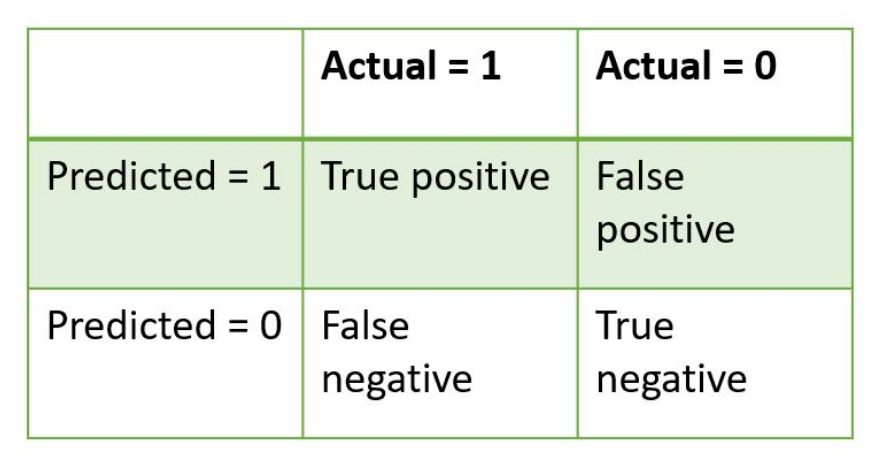


## ***Build and assess a model: movies reviews***

In this problem, you will build a logistic regression model using the `movies` dataset. The score is stored in the `label` column and is `1` when the review is positive, and `0` when negative. The text review has been transformed, using BOW, to numeric columns.

You have already built a classifier but evaluated it using the same data employed in the training step. Make sure you now assess the model using an unseen test dataset. How does the performance of the model change when evaluated on the test set?


* Perform the train/test split, specifying that 20% of the data should be used as a test set.
* Train a logistic regression model.
* Print out the accuracy of the model on the training and on the testing data.

In [ ]:
df = pd.read_csv('IMDB_sample.csv').drop(columns='Unnamed: 0')

vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b', max_features=201)
vect.fit(df['review'])

# Transform the review column
X_review = vect.transform(df['review'])
# Create the bow representation
movies = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
movies = pd.concat([df['label'], movies], axis=1)

# Define the vector of targets and matrix of features
y = movies.label
X = movies.drop('label', axis=1)

##############################################################################

# Import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define the vector of labels and matrix of features
y = movies['label']
X = movies.drop(columns='label')

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression(max_iter=9999).fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  0.7853333333333333
Accuracy on test set:  0.7475016655562958


Did you notice how the logistic regression's accuracy decreases when we evaluate it on the test set instead of on the training set? It's normal to observe a small drop but if the decrease is large, this could be a signal that your model will not generalize well and will do poorly when evaluating new movie reviews.

## ***Performance metrics of Twitter data***

You will train a logistic regression model that predicts the sentiment of tweets and evaluate its performance on the test set using different metrics.

A matrix `X` has been created for you. It contains features created with a BOW on the `text` column.

The labels are stored in a vector called `y`. Vector `y` is `0` for `negative` tweets, `1` for `neutral`, and `2` for `positive` ones.
Note that although we have 3 classes, it is still a classification problem. The accuracy still measures the proportion of correctly predicted instances. <ins>*The confusion matrix will now be of size 3x3*</ins>, each row will give the number of predicted cases for classes `2`, `1`, and `0`, and each column - the true number of cases in class `2`, `1`, and `0`.

* Perform the train/test split, and stratify by `y`.
* Train a a logistic regression classifier.
* Predict the performance on the test set.
* Print the accuracy score and confusion matrix obtained on the test set.

In [ ]:
tweets = pd.read_csv('Tweets.csv')[['airline_sentiment', 'text', 'negativereason']].head(2928)
tweets.replace({'airline_sentiment':{'negative':0, 'neutral':1, 'positive':2}}, inplace=True)

# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b', max_features=118, stop_words=ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm']), ngram_range=(1, 2)).fit(tweets['text'])
df1 = vect.transform(tweets['text'])

# Create the bow representation
df = pd.DataFrame(df1.toarray(), columns=vect.get_feature_names_out())
tweets = pd.concat([tweets['airline_sentiment'], df], axis=1)

# Define the vector of targets and matrix of features
y = tweets['airline_sentiment']
X = tweets.drop(columns='airline_sentiment')

###############################################################################

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Train a logistic regression
log_reg = LogisticRegression(max_iter=9999).fit(X_train, y_train)

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.7110352673492605
Confusion matrix test set: 
 [[0.5847554  0.03868032 0.02502844]
 [0.11831627 0.05802048 0.02389078]
 [0.05460751 0.02844141 0.06825939]]


Although the sentiment category here has 3 classes instead of 2, the way we trained and evaluated the model is the same as with 2 classes. The accuracy on the test data was good and the confusion matrix can also show us which category we are bad at predicting.

## ***Build and assess a model: product reviews data***


In this exercise, you will build a logistic regression using the reviews dataset, containing customers' reviews of Amazon products. The array `y` contains the sentiment : `1` if positive and `0` otherwise. The array `X` contains all numeric features created using a BOW approach. Feel free to explore them in the IPython Shell.

Your task is to build a logistic regression model and calculate the accuracy and confusion matrix using the test dataset.

* Split the data into training and testing, using 30% of it as a test set and set the random seed to `42`.
* Train a logistic regression model.
* Print out the accuracy score and confusion matrix using the test data.

In [ ]:
df = pd.read_csv('amazon_reviews_sample.csv').drop(columns='Unnamed: 0')

# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b', max_features=200, stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2)).fit(df['review'])
df1 = vect.transform(df['review'])

# Create the bow representation
reviews = pd.DataFrame(df1.toarray(), columns=vect.get_feature_names_out())
reviews = pd.concat([df['score'], reviews], axis=1)

# Define the vector of targets and matrix of features
y = reviews['score']
X = reviews.drop(columns='score')

###############################################################################   

from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a logistic regression
log_reg = LogisticRegression(max_iter=9999).fit(X_train, y_train)

# Predict the labels 
y_predict = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score of test data: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of test data: \n', confusion_matrix (y_test, y_predict)/len(y_test))


Accuracy score of test data:  0.7853333333333333
Confusion matrix of test data: 
 [[0.39333333 0.11266667]
 [0.102      0.392     ]]


You have successfully built another logistic regression model and evaluated its performance on the test set. Is there any way we can improve the performance of the model?

# **Regularization**

* **`l2`**: shrinks all coefficients towards zero, effectively reduce the impact of each feature.
* High values of **`C`**: low penalization, model fits the training data well.
* Low values of **`C`**: high penalization, model less flexible.  The logistic regression coefficients are closer to zero.

In [ ]:
# Regularization arguments
LogisticRegression(penalty='l2', C=1.0)

# **Predicting a probability vs. predicting a class**



In [ ]:
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict labels
y_predicted = log_reg.predict(X_test)

# Predict probability
y_probab = log_reg.predict_proba(X_test)



```
y_probab

array([[0.5002245, 0.4997755], 
       [0.4900345, 0.5099655],
        ...,
        [0.7040499, 0.2959501]])
```

* ค่าตัวเลขในคอลัมน์แรก จะเป็นค่าตัวเลขของ class label = 0 และค่าตัวเลขในคอลัมน์ที่สองจะเป็นค่าตัวเลขของ class label = 1

# **Model metrics with predicted probabilities**



```
# Default probability encoding:
# If probability >= 0.5, then class 1 Else class 0
```
## ***Predict probabilities of movie reviews***

In this problem, you will build a logistic regression using the `movies` dataset. The labels are stored in the array `y` and the features in `X`.

Train the model on the training data. Instead of predicting classes, predict the probabilities that each instance in the test set belongs to each of the two classes.


* Split the data into training and testing set.
* Train a logistic regression model.
* Predict the probabilities for class `0` and for class `1` of the testing data. Class `0` is located as the first column in the predicted probabilities, and class `1` is the second one.


In [ ]:
df = pd.read_csv('IMDB_sample.csv').drop(columns='Unnamed: 0')

vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b', max_features=201)
vect.fit(df['review'])

# Transform the review column
X_review = vect.transform(df['review'])
# Create the bow representation
movies = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
movies = pd.concat([df['label'], movies], axis=1)

# Define the vector of targets and matrix of features
y = movies.label
X = movies.drop('label', axis=1)

##############################################################################

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

# Train a logistic regression
log_reg = LogisticRegression(max_iter=9999).fit(X_train, y_train)

# Predict the probability of the 0 class
prob_0 = log_reg.predict_proba(X_test)[:, 0]
# Predict the probability of the 1 class
prob_1 = log_reg.predict_proba(X_test)[:, 1]

print("First 10 predicted probabilities of class 0: ", prob_0[:10], "\n")
print("First 10 predicted probabilities of class 1: ", prob_1[:10])

First 10 predicted probabilities of class 0:  [0.86334691 0.90504098 0.6176952  0.15897883 0.86675299 0.88179603
 0.61176474 0.77308245 0.44510199 0.31158837] 

First 10 predicted probabilities of class 1:  [0.13665309 0.09495902 0.3823048  0.84102117 0.13324701 0.11820397
 0.38823526 0.22691755 0.55489801 0.68841163]


Did you notice how the probabilities of class 0 and class 1 add up to 1 for each instance? In problems where the proportion of one class is larger than the other, we might want to work with predicted probabilities instead of predicted classes.

## ***Product reviews with regularization***

In this exercise, you will work once more with the `reviews` dataset of Amazon product reviews. A vector of labels `y` contains the sentiment : 

* `1` if positive and 
* `0` otherwise. 

The matrix `X` contains all numeric features created using a BOW approach.

You will need to train two logistic regression models with different levels of regularization and compare how they perform on the test data. Remember that regularization is a way to control the complexity of the model. The more regularized a model is, the less flexible it is but the better it can generalize. Models with higher level of regularization are often less accurate than non-regularized ones.

* Split the data into a train and test sets.
* Train a logistic regression with regularization parameter of `1000`. Train a second logistic regression with regularization parameter equal to `0.001`.
* Print the accuracy scores of both models on the test set.

In [ ]:
df = pd.read_csv('amazon_reviews_sample.csv').drop(columns='Unnamed: 0')

# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b', max_features=200, stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2)).fit(df['review'])
df1 = vect.transform(df['review'])

# Create the bow representation
reviews = pd.DataFrame(df1.toarray(), columns=vect.get_feature_names_out())
reviews = pd.concat([df['score'], reviews], axis=1)

# Define the vector of targets and matrix of features
y = reviews['score']
X = reviews.drop(columns='score')

###############################################################################

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train a logistic regression with regularization of 1000
log_reg1 = LogisticRegression(C=1000).fit(X_train, y_train)
# Train a logistic regression with regularization of 0.001
log_reg2 = LogisticRegression(C=0.001).fit(X_train, y_train)

# Print the accuracies
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

Accuracy of model 1:  0.785
Accuracy of model 2:  0.7405


Did you notice how the model with higher degree of penalization(low C) has lower accuracy than the one with very little penalization(high C)? We often sacrifice some accuracy when we regularize a model but the benefit is lower complexity and lower chance of overfitting.

## ***Regularizing models with Twitter data***

You will work with the Twitter data expressing customers' sentiment about airline companies. The `X` matrix of features and `y` vector of labels have been created for you. In addition, the training and testing split has been performed. You can work with the `X_train`, `X_test`, `y_train` and `y_test` arrays directly.

You will train regularized and a more flexible models and evaluate them using different model performance metrics.

All required packages have been imported for you.

* Train two logistic regressions: one with regularization parameter of `100` and a second of `0.1`.

* Print the accuracy scores of both models.

* Print the confusion matrix of each model.

In [ ]:
tweets = pd.read_csv('Tweets.csv')[['airline_sentiment', 'text', 'negativereason']].head(2928)
tweets.replace({'airline_sentiment':{'negative':0, 'neutral':1, 'positive':2}}, inplace=True)

# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b', max_features=118, stop_words=ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm']), ngram_range=(1, 2)).fit(tweets['text'])
df1 = vect.transform(tweets['text'])

# Create the bow representation
df = pd.DataFrame(df1.toarray(), columns=vect.get_feature_names_out())
tweets = pd.concat([tweets['airline_sentiment'], df], axis=1)

# Define the vector of targets and matrix of features
y = tweets['airline_sentiment']
X = tweets.drop(columns='airline_sentiment')

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

###############################################################################


# Build a logistic regression with regularizarion parameter of 100
log_reg1 = LogisticRegression(max_iter=9999, C=100).fit(X_train, y_train)
# Build a logistic regression with regularizarion parameter of 0.1
log_reg2 = LogisticRegression(max_iter=9999, C=0.1).fit(X_train, y_train)

# Predict the labels for each model
y_predict1 = log_reg1.predict(X_test)
y_predict2 = log_reg2.predict(X_test)

# Print performance metrics for each model
print('Accuracy of model 1: ', accuracy_score(y_test, y_predict1))
print('Accuracy of model 2: ', accuracy_score(y_test, y_predict2))
print('Confusion matrix of model 1: \n' , confusion_matrix(y_test, y_predict1)/len(y_test))
print('Confusion matrix of model 2: \n', confusion_matrix(y_test, y_predict2)/len(y_test))

Accuracy of model 1:  0.71160409556314
Accuracy of model 2:  0.7218430034129693
Confusion matrix of model 1: 
 [[0.58361775 0.04778157 0.01706485]
 [0.12627986 0.06996587 0.01877133]
 [0.06313993 0.01535836 0.05802048]]
Confusion matrix of model 2: 
 [[0.62627986 0.01706485 0.00511945]
 [0.15699659 0.04266212 0.01535836]
 [0.06996587 0.01365188 0.05290102]]


You have trained a more and less flexible logistic regressions to predict the sentiment of tweets and evaluated them using different performance metrics. In this case, we again sacrificed some accuracy when we imposed regularizarion.

## ***Step 1: Word cloud and feature creation***

  You will work with a sample of the `reviews` dataset throughout this exercise. In the first step, you will build a word cloud using only positive reviews. The string `positive_reviews` has been created for you by concatenating the top 100 positive reviews.

In the second step, you will create a new feature for the length of each review and add that new feature to the dataset.

All the functions needed to plot a word cloud have been imported for you, as well as the **`word_tokenize`** function from the **`nltk`** module.


* Call and create a word cloud image using the `positive_reviews`.
* Display the generated image.

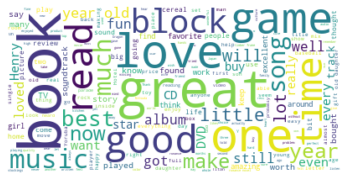

In [10]:
reviews = pd.read_csv('amazon_reviews_sample.csv').drop(columns='Unnamed: 0')
positive = reviews[reviews['score']==1]['review'].head(100)
positives = [i for i in positive]
positive_reviews = ' '.join(positives)

# Create and generate a word cloud image
cloud_positives = WordCloud(background_color='white').generate(positive_reviews)
 
# Display the generated wordcloud image
plt.imshow(cloud_positives, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()    

* Tokenize each item in the `review` column, using the word tokenizing function.
* Iterate over the created `word_tokens` list and find the length of each item in the list. Append that length to the empty `len_tokens` list.

In [12]:
# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews['review']]

# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens
reviews.head()

,score,review,n_words
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109


Which words stood out in the word cloud image? After you have successfully created a feature about the number of tokens in each review, it is time to transform the text of the review.

## ***Step 2: Building a vectorizer***

Build a TfIDf transformation of the `review` column in the `reviews` dataset. You are asked to specify the n-grams, stop words, the pattern of tokens and the size of the vocabulary arguments.

This is the last step before we train a classifier to predict the sentiment of a review.

Make sure you specify the maximum number of features properly, as a very large vocabulary size could disconnect your session.


* Import the Tfidf vectorizer and the default list of English stop words.
* Build the Tfidf vectorizer, specifying - in this order - the following arguments: 
  * use as stop words the default list of English stop words; 
  * as n-grams use uni- and bi-grams;
  * the maximum number of features should be 200; 
  * capture only words using the specified pattern.

* Create a DataFrame using the Tfidf vectorizer.

In [28]:
# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(reviews.review)
# Create sparse matrix from the vectorizer
X = vect.transform(reviews['review'])

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
print('Top 5 rows of the DataFrame: \n')
reviews_transformed.head()

Top 5 rows of the DataFrame: 



,able,action,actually,ago,album,amazing,amazon,author,away,bad,...,work,works,world,worst,worth,writing,written,wrong,year,years
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.274041,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.219408,0.0,0.0,0.0,0.0,0.208885
2,0.0,0.0,0.0,0.0,0.0,0.382773,0.0,0.0,0.000000,0.0,...,0.142935,0.0,0.0,0.0,0.160089,0.0,0.0,0.0,0.0,0.152410
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


You have transfomed the text column using the TfidfVectorizer and created 200 numeric columns from the review. You are now ready to build a binary classifier predicting the sentiment of a review.

## ***Step 3: Building a classifier***

This is the last step in the sentiment analysis prediction. We have explored and enriched our dataset with features related to the sentiment, and created numeric vectors from it.

You will use the dataset that you built in the previous steps. Namely, it contains a feature for the length of reviews, and 200 features created with the Tfidf vectorizer.

Your task is to train a logistic regression to predict the sentiment. The data has been imported for you and is called `reviews_transformed`. The target is called score and is binary : `1` when the product review is positive and `0` otherwise.

Train a logistic regression model and evaluate its performance on the test data. How well does the model do?

* Perform the train/test split, allocating 20% of the data to testing and setting the random seed to `456`.
* Train a logistic regression model.
* Predict the class.
* Print out the accuracy score and the confusion matrix on the test set.

In [29]:
reviews_transformed = pd.concat([reviews[['score', 'n_words']], reviews_transformed], axis=1)

# Define X and y
y = reviews_transformed['score']
X = reviews_transformed.drop(columns='score')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

# Train a logistic regression
log_reg = LogisticRegression(max_iter=9999).fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.7885
[[0.411  0.115 ]
 [0.0965 0.3775]]


 You have trained and evaluated a logistic regression classifier using product reviews which you have transformed to numeric features. You are now ready to tackle other sentiment analysis problems.